In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
import scipy.stats as stats 

### The CLT states that the sampling distribution of the mean is normally distributed as long as the population is not too skewed or the sample size is large enough. Using a sample size of n > 30 is usually a good rule of thumb, regardless of what the distribution of the population is like. If the distribution of the population is normal, the sample size can be smaller than that.

In [4]:
fish_len_mm = pd.read_csv("Fish Length Output.csv", index_col=0) 
fish_len_mm = fish_len_mm["Field_Length_Millimeters"] 
fish_len_mm

2       123.0
3       122.0
4       133.0
5       121.0
6       165.0
        ...  
5383     86.0
5384    100.0
5385    103.0
5386     95.0
5393    190.0
Name: Field_Length_Millimeters, Length: 4092, dtype: float64

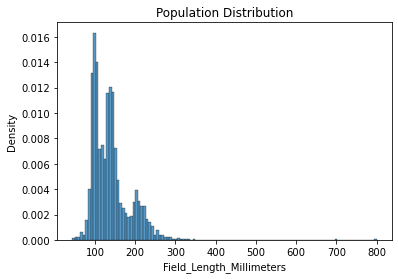

In [5]:
# Checkpoint 1:
sns.histplot(fish_len_mm, stat = 'density' )
plt.title("Population Distribution")
plt.show() 

In [6]:
# Checkpoint 2
sample_means = [] 
samp_size = 50

for i in range(500):
    samp = np.random.choice(fish_len_mm, samp_size, replace = False)
    this_sample_mean = np.mean(samp)
    sample_means.append(this_sample_mean) 

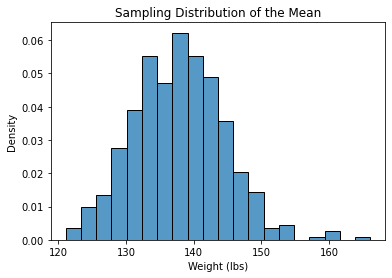

In [7]:
## Checkpoint 3
sns.histplot(sample_means, stat = 'density' )
plt.title("Sampling Distribution of the Mean")
plt.xlabel("Weight (lbs)")
plt.show() 

### The CLT not only establishes that the sampling distribution will be normally distributed, but it also allows us to describe that normal distribution quantitatively. Normal distributions are described by their mean μ (mu) and standard deviation σ (sigma).

### We take samples of size n from a population (that has a true population mean μ and standard deviation of σ) and calculate the sample mean x.
### Given that n is sufficiently large (n > 30), the sampling distribution of the means will be normally distributed with:
### - mean *x* approximately equal to the population mean *μ*
### - standard deviation equal to the population standard deviation divided by the square root of the sample size.

C:\Users\jonco\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\jonco\Anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


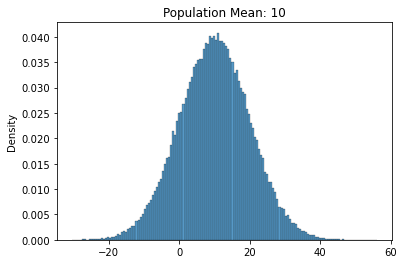

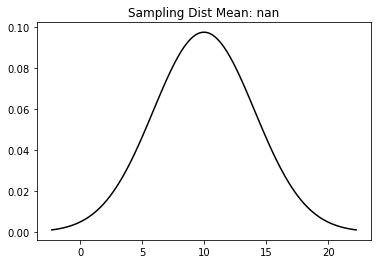

In [12]:
# Set the population mean & standard deviation:
pop_mean = 10
pop_std_dev = 10
# Set the sample size:
samp_size = 6 

# Create the population
fish_len_mm_pop = np.random.normal(pop_mean, pop_std_dev, size = 100000) 

# Simulate the samples and calculate the sampling distribution
samp_means = []
for i in range(500):
    samp = np.random.choice(fish_len_mm_pop , samp_size, replace = False)
    sample_means.append(np.mean(samp)) 

mean_sampling_distribution = round(np.mean(samp_means),3) 

# Plot the original population
sns.histplot(fish_len_mm_pop, stat = 'density')
plt.title(f"Population Mean: {pop_mean}")
plt.xlabel("")
plt.show() 

## Plot the sampling distribution
sns.histplot(samp_means, stat='density')
# calculate the mean and SE for the probability distribution
mu = np.mean(fish_len_mm_pop)
sigma = np.std(fish_len_mm_pop)/(samp_size**.5)
# plot the normal distribution with mu=popmean, sd=sd(pop)/sqrt(samp_size) on top
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

plt.plot(x, stats.norm.pdf(x, mu, sigma), color='k', label = 'normal PDF')
plt.title(f"Sampling Dist Mean: {mean_sampling_distribution}")
plt.xlabel("")
plt.show()